In [3]:
from operator import truediv

#1.导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']
rcParams['font.sans-serif'] = ['STHeiti']

In [4]:
#2.导入数据
df = pd.read_csv('/Users/zhangke/Downloads/Data Analyst/house_sales.csv')

In [5]:
#3.数据概览
print('总记录数',len(df))
print('字段数量',len(df.columns))
df.head(5)
df.info()

总记录数 106118
字段数量 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106118 entries, 0 to 106117
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   city        106118 non-null  object
 1   address     104452 non-null  object
 2   area        105324 non-null  object
 3   floor       104024 non-null  object
 4   name        105564 non-null  object
 5   price       105564 non-null  object
 6   province    106118 non-null  object
 7   rooms       104036 non-null  object
 8   toward      105240 non-null  object
 9   unit        105564 non-null  object
 10  year        57736 non-null   object
 11  origin_url  105564 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


In [6]:
# 4.数据清洗
df.head(5)
#删除无用的数据列
df.drop(columns='origin_url',inplace=True)

In [7]:
# 检查是否有缺失值
df.isna().sum()
#删除缺失值
df.dropna(inplace=True)

In [8]:
#检查是否有重复值
df.duplicated().sum()
#删除重复值
df.drop_duplicates(inplace=True)
print(len(df))

28104


In [9]:
#面积的数据类型转换
df['area'] = df['area'].str.replace('㎡','').astype(float)
#售价的数据类型转换
df['price'] = df['price'].str.replace('万','').astype(float)
# 朝向的数据类型转换
#df['toward'].value_counts()
df['toward'] = df['toward'].astype('category')
df['unit'] = df['unit'].str.replace('元/㎡','').astype(float)
# 建造年份的数据类型
df['year'] = df['year'].str.replace('年建','').astype(int)

In [19]:
print(len(df))
len(df[(df['area']<600) & (df['area']>20)])

28079


28079

In [20]:
#异常值的处理
#房屋面积的异常处理
df = df[(df['area']<600) & (df['area']>20)]

#df.info()

In [23]:
#房屋售价的异常值处理 IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
low_price = Q1 - 1.5 * IQR
high_price = Q3 + 1.5 * IQR
len(df[( df['price']<high_price) & (df['price']>low_price) ])

26135

In [36]:
#5.新数据特征构造
# 地区district
df['district'] = df['address'].str.split('-').str[0]

In [49]:
# 楼层的类型floor_type
#df.sample(10)
df['floor_type'] = df['floor'].str.split('（').str[0].astype('category')
def fun1(str1):
    if pd.isna(str1):
        return '未知'
    elif '低' in str1:
        return '低楼层'
    elif '中' in str1:
        return '中楼层'
    elif '高' in str1:
        return '高楼层'
df['floor_type2'] = df['floor'].apply(fun1).astype('category')
# 是否是直辖市 zxs
# def fun2(str2):
#     if str2 in ['北京','上海','天津','重庆']:
#         return True
#     else:
#         return False
# df['city'].apply(fun2)
df['zxs'] = df['city'].apply(lambda x:1 if x in ['北京','上海','天津','重庆'] else 0)
# 卧室的数量 bedrooms
df['bedrooms'] = df['rooms'].str.split('室').str[0].astype(int)
# 客厅的数量 living rooms
# df['livingrooms'].str.split('室').str[1].str.split('厅').str[0].astype(int) #有点太麻烦了,用正则表达式
df['livingrooms'] = df['rooms'].str.extract(r'(\d+)厅').astype(int)
# 楼龄building_age
df['building_age'] = 2025 - df['year']
# 价格的分段 price_lables
df['price_lables'] = pd.cut(df['price'], bins=4, labels=['低价','中价','高价','豪华'])  #pd.cut() - pandas 的分箱函数，用于将连续数值转换为分类数据,bins=4 - 将数据分成 4 个等宽的区间,labels=['低价','中价','高价','豪华'] - 为这 4 个区间指定中文标签

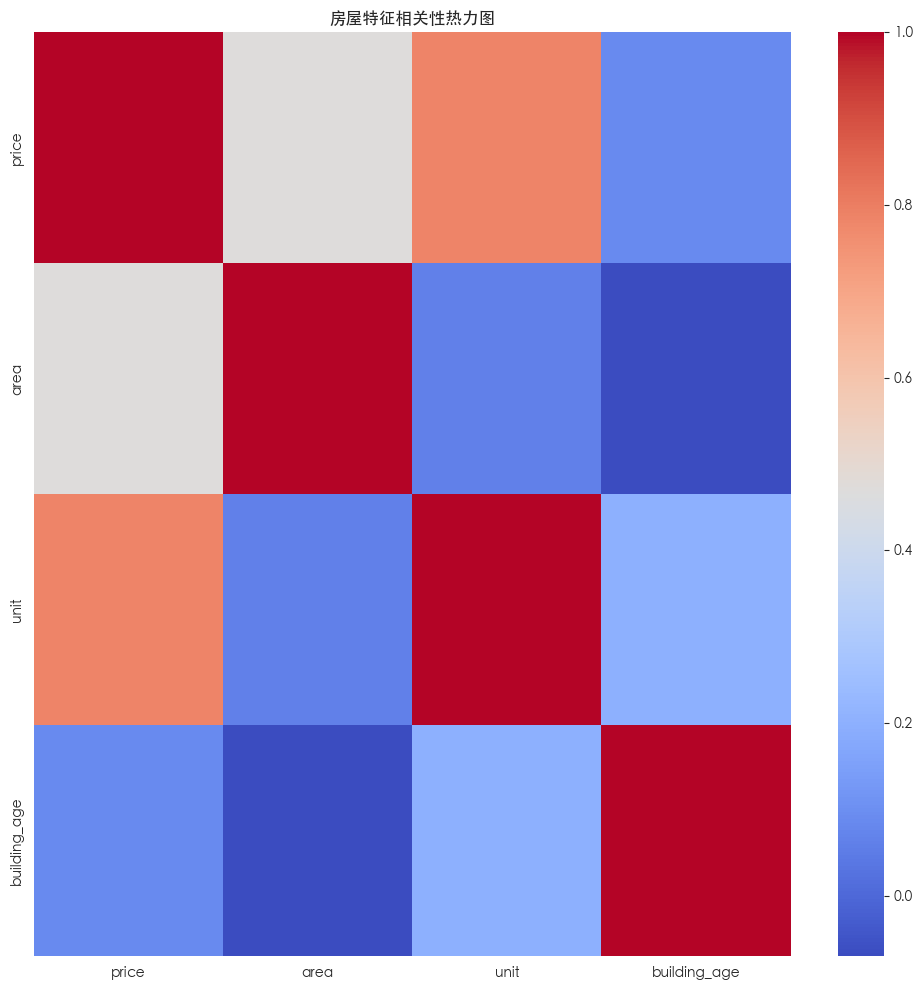

In [87]:
#6. 问题分析及可视化
"""
问题编号:A1
问题:哪些变量最影响房价?面积、楼层、房间数哪个影响更大?
分析主题:特征相关性
分析目标:了解房屋各特征对房价的线性影响
分组字段:无
指标/方法:皮尔逊相关系数
"""
#选择数值型的特征
a = df[['price','area','unit','building_age']].corr() #简单记忆： 选择多列 = 双括号，返回 DataFrame；选择单列 = 单括号，返回 Series。
# 对房价的影响最大的几个因素的排序
a['price'].sort_values(ascending=False)[1:]
# 相关性的热力图
plt.figure(figsize = (10,10))
sns.heatmap(a,cmap = 'coolwarm')
plt.title('房屋特征相关性热力图')
plt.tight_layout()

In [75]:
df.sample(10)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,floor_type2,bedrooms,livingrooms,building_age,zxs,price_lables
17400,法库,华山地区,58.00,中层（共11层）,方林徽府,95.8,辽宁,2室2厅,南北向,16517.0,2018,华山地区,中层,中楼层,2,2,7,0,低价
65078,海阳,东村,86.49,中层（共29层）,碧桂园十里金滩,49.8,山东,3室2厅,南北向,5758.0,2015,东村,中层,中楼层,3,2,10,0,低价
103858,哈尔滨,松浦,70.50,低层（共32层）,松浦观江国际,70.0,黑龙江,2室1厅,南北向,9929.0,2009,松浦,低层,低楼层,2,1,16,0,低价
36044,新沂,高铁站,90.00,低层（共18层）,月星星湖湾,130.0,江苏,2室2厅,南向,14444.0,2015,高铁站,低层,低楼层,2,2,10,0,低价
15096,中山,横栏镇,119.00,低层（共16层）,锦江尚苑,113.0,广东,3室2厅,南向,9496.0,2019,横栏镇,低层,低楼层,3,2,6,0,低价
57626,阳曲,五一路,114.00,中层（共6层）,太原大学小区,135.0,山西,3室2厅,南北向,11842.0,1999,五一路,中层,中楼层,3,2,26,0,低价
61488,昌黎,北戴河其他,104.00,中层（共11层）,香邑澜湾,98.0,河北,3室2厅,南北向,9423.0,2018,北戴河其他,中层,中楼层,3,2,7,0,低价
39078,连云港,老城区,115.69,低层（共6层）,清源小区,98.6,江苏,3室2厅,南北向,8523.0,2008,老城区,低层,低楼层,3,2,17,0,低价
53898,汝阳,洛龙体育场,135.00,高层（共32层）,建业高尔夫花园,209.0,河南,3室2厅,南北向,15481.0,2012,洛龙体育场,高层,高楼层,3,2,13,0,低价
29856,德惠,中东大市场,109.00,低层（共14层）,福临家园,99.8,吉林,2室1厅,南向,9156.0,2008,中东大市场,低层,低楼层,2,1,17,0,低价


In [51]:



df.info()
#6.问题分析及可视化


<class 'pandas.core.frame.DataFrame'>
Index: 28079 entries, 0 to 106088
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city         28079 non-null  object  
 1   address      28079 non-null  object  
 2   area         28079 non-null  float64 
 3   floor        28079 non-null  object  
 4   name         28079 non-null  object  
 5   price        28079 non-null  float64 
 6   province     28079 non-null  object  
 7   rooms        28079 non-null  object  
 8   toward       28079 non-null  category
 9   unit         28079 non-null  float64 
 10  year         28079 non-null  int64   
 11  district     28079 non-null  object  
 12  floor_type   28079 non-null  category
 13  floor_type2  28079 non-null  category
dtypes: category(3), float64(3), int64(1), object(7)
memory usage: 3.7+ MB


In [88]:
'''
问题编号:A2
问题:全国房价总体分布是怎样的?是否存在极端值?
分析主题:描述性统计
分析目标:概览数值型字段的分布特征
分组字段:无
指标/方法:平均数/中位数/四分位数/标准差
'''
df.describe()

,area,price,unit,year,bedrooms,livingrooms,building_age,zxs
count,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000,28079.000000
mean,107.829038,147.541519,13429.487553,2012.924463,2.770398,1.857687,12.075537,0.011895
std,41.189153,173.377815,10920.563531,6.117544,0.845008,0.411881,6.117544,0.108416
min,21.000000,9.000000,1000.000000,1930.000000,0.000000,0.000000,2.000000,0.000000
25%,86.000000,74.000000,7779.500000,2010.000000,2.000000,2.000000,8.000000,0.000000
50%,101.400000,109.000000,10833.000000,2015.000000,3.000000,2.000000,10.000000,0.000000
75%,126.000000,167.000000,15396.000000,2017.000000,3.000000,2.000000,15.000000,0.000000
max,588.000000,6899.000000,456311.000000,2023.000000,9.000000,12.000000,95.000000,1.000000


(array([2.7758e+04, 2.3800e+02, 5.9000e+01, 1.1000e+01, 2.0000e+00,
        5.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   9.,  698., 1387., 2076., 2765., 3454., 4143., 4832., 5521.,
        6210., 6899.]),
 <BarContainer object of 10 artists>)

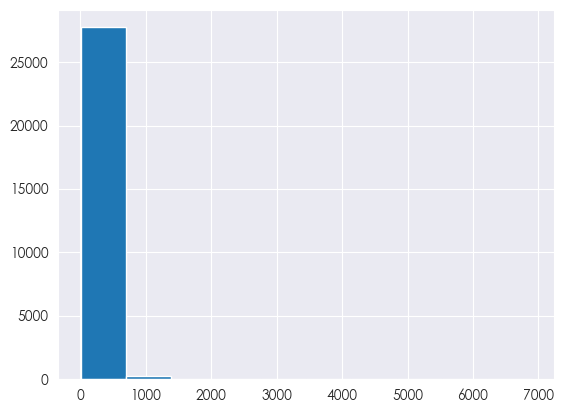

In [93]:
#房价分布的直方图
plt.subplot(111)
plt.hist(df['price'],bins=10)

<Axes: xlabel='price', ylabel='Count'>

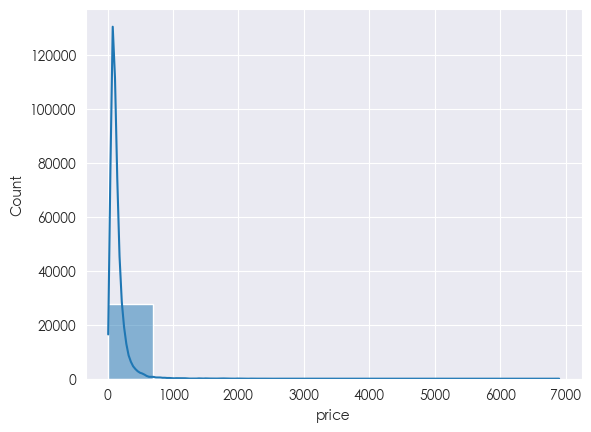

In [96]:
sns.histplot(data=df,x='price',bins=10,kde=True)

In [ ]:
'''
问题编号:A6
问题:南北向是否真比单一朝向贵?贵多少?
分析主题:朝向溢价
分析目标:评估不同朝向的价格差异
分组字段:toward
指标/方法:方差分析/多重比较
'''